# 2016017032 이호열 기말과제1

## Wine clustering
* 아래 와인 데이터를 이용하여 와인을 클러스터링하고 보고서를 작성하세요.
* 코드, 클러스터링 결과, 보고서를 종합적으로 평가합니다.
* 다음 사이트의 다양한 클러스터링 기법을 참조하세요.
* https://scikit-learn.org/stable/modules/clustering.html

In [2]:
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

wine = load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [3]:
X=wine['data']
y=wine['target'] # class_0', 'class_1', 'class_2

In [4]:
X.shape, y.shape

((178, 13), (178,))

In [5]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [6]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

### wine의 산점도 행렬

In [7]:
df = pd.DataFrame(wine.data, columns=wine.feature_names)
sy = pd.Series(wine.target, dtype="category")
sy = sy.cat.rename_categories(wine.target_names)
df['class'] = sy
df.tail()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0,class_2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0,class_2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0,class_2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0,class_2
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0,class_2


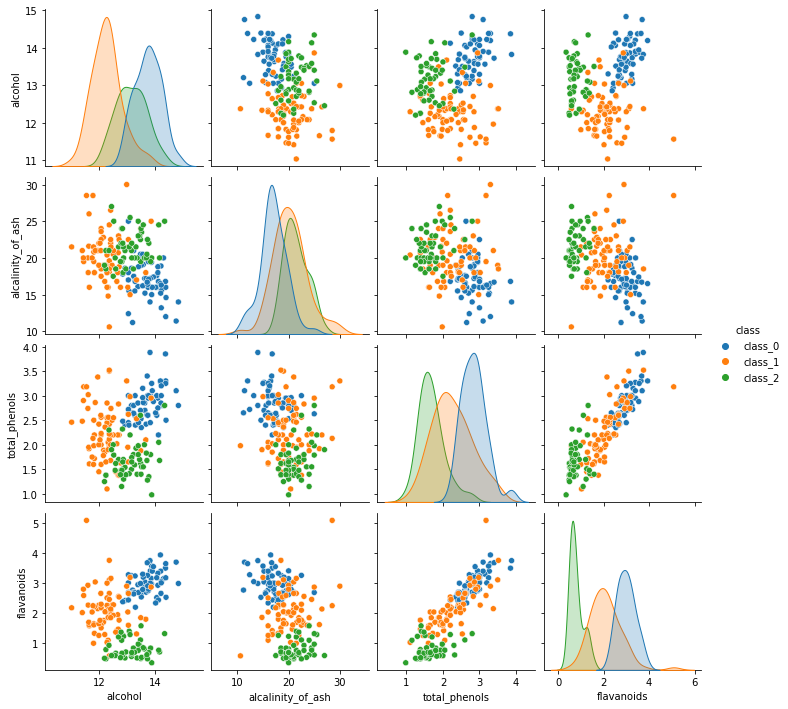

In [8]:
import seaborn as sns

sns.pairplot(vars=["alcohol", "alcalinity_of_ash", "total_phenols", "flavanoids"], hue="class", data=df)
plt.show()

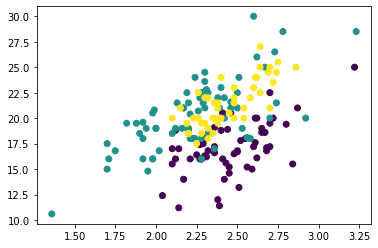

In [12]:
Xall=wine["data"] 
y=wine["target"]
X=[Xall[:,2],Xall[:,3]]
plt.scatter(X[0],X[1],c=y)

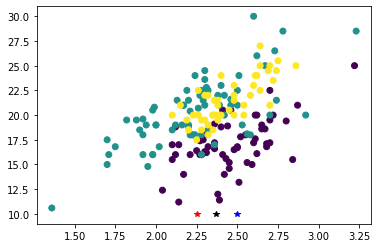

In [13]:
plt.scatter(X[0],X[1],c=y)
plt.plot([2.25],[10],'r*')
plt.plot([2.37],[10],'k*')
plt.plot([2.50],[10],'b*')

In [14]:
temp=[]
for (i,j) in zip(X[0],X[1]):
    r1=(i-2.25)**2 + (j-10)**2
    r2=(i-2.37)**2 + (j-10)**2
    r3=(i-2.50)**2 + (j-10)**2
    m=min(r1,r2,r3)
    temp.append([r1,r2,r3].index(m))
    m=m+1

In [15]:
x1=np.transpose([[i,j] for (t,i,j) in zip(temp,X[0],X[1]) if(t==0)])
x2=np.transpose([[i,j] for (t,i,j) in zip(temp,X[0],X[1]) if(t==1)])
x3=np.transpose([[i,j] for (t,i,j) in zip(temp,X[0],X[1]) if(t==2)])
r1=np.mean(x1[0]),np.mean(x1[1])
r2=np.mean(x2[0]),np.mean(x2[1])
r3=np.mean(x3[0]),np.mean(x3[1])

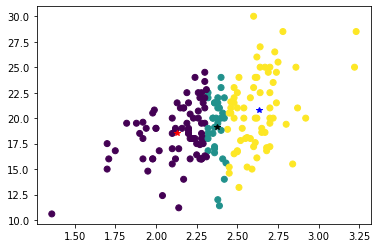

In [16]:
plt.scatter(X[0],X[1],c=temp)
plt.plot(r1[0],r1[1],'r*')
plt.plot(r2[0],r2[1],'k*')
plt.plot(r3[0],r3[1],'b*')

### sklearn.cluster.KMeans

In [17]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3)
data = np.transpose(X)
kmeans.fit(data)

KMeans(n_clusters=3)

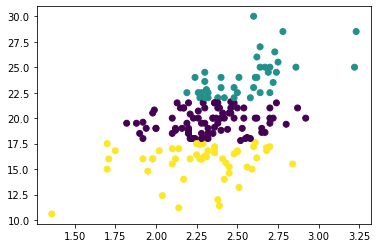

In [18]:
plt.scatter(X[0],X[1],c=kmeans.labels_)

* 가장 가까운 군집 중심까지의 데이터 포인트 거리 합계

In [19]:
kmeans.inertia_

419.91348895348847

In [20]:
kiner = {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    kiner[k] = kmeans.inertia_

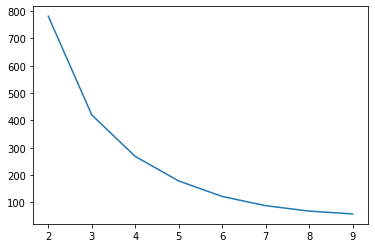

In [21]:
plt.plot(list(kiner.keys()), list(kiner.values()))

# 보고서

### 위에서 사용한 clustering의 방법은 k-평균 알고리즘(K-means clustering algorithm)으로서 주어진 데이터를 k개의 클러스터로 묶는 알고리즘으로, 각 클러스터와 거리 차이의 분산을 최소화하는 방식으로 작용한다. 풀어 말해서 집단 개수(N)를 선택한 다음에 적당한 중심점(센트로이드)을 N개를 임의로 선택하고 데이터 포인트와 선택한 중심점에서 사이의 거리를 계산하여 가장 가까운 점을 해당 데이터가 속한 집단으로 정한 후에 집단의 데이터 평균을 계산하고 그 점을 새로운 중심점으로 정해서 중심점의 위치가 바뀌지 않을 때까지 앞의 과정을 반복한 것이다.
### 위의 산점도 행렬의 그래프와 K-means clustering을 적용한 후의 그래프를 보면 군집화가 잘 되었음을 알수 있으며 아래의 가장 가까운 군집 중심까지의 데이터 포인트 거리 합계를 나타내는 kmeans.inertia_를 사용한 그래프를 보면 즉, 군집내에 분산을 뜻하는 그래프를 보아도 군집화가 잘 되었음을 알 수 있다.
